In [1]:
import pandas as pd

# Load breast cancer dataset and an additional dataset on breast cancer
def load_data():
    try:
        bc_data = pd.read_csv('SEER Breast Cancer Dataset .csv')
        return bc_data
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None, None

bc_data = load_data()

# Display the first few rows of both datasets to understand their structure
(bc_data.head())
# Display the dataset overview and first few rows
print("Dataset Overview:")
print(bc_data.info())







Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months       


____

## <font color=#33AA44>Problem #4: Project (20pts)</font>


In this problem you will work on your project.

Keep in mind that for the midterm, you do not need a complete project. You will need that by the end of the semester. The goals for the midterm project are:

* you have a dataset chosen
* you have done IDA and EDA
* you have a good sense that this dataset will do what you want
* you have a Github repo set up where all of your project work lives
* you are becoming an expert on Streamlist and building apps
* you have completed all of the data science tasks we have covered to date on this dataset (if they apply)
    - this could include:
        - encoding
        - scaling
        - imputation
        - transforming
        - and so on.....review the topics from each week of the course to get a list of everything we have covered so far
* importantly, you can communicate:
    - effective visualization, including interactive visualizations
    - storytelling: you know your audience and you know your user (recall the ICA on knowing who you are presenting your data to)

Also, recall that you can change your project after the midterm. I don't recommend this! It will be much more rewarding if you take your current work to a very complete deliverable by working on it for the entire semester. But, there are cases where this just doesn't work out (and it is totally ok!):
* the data didn't do what you hoped it would: it is very common for us to be overly ambitious with our goals relative to what is in datasets we didn't make ourselves 
* you realize that your original idea is not that interesting after all
* you want to stretch yourself and do a "second" project on something completely different: you might fall in love with _spatiotemporal_ data or _textual_ data in the next few weeks!

So, what should you do for this HW problem? Acknowledge that you have read this: here is what we will do the week before Fall Break (next week!). We will have two ICAs: no lecture. On Tuesday, you will present your project informally to your group. You will have a set of questions to ask each other and you will turn that in as your ICA. You will also teach each other "tricks": 
* how does each person plan to tell their story (this might not be complete until the end of the semester)
* what visualization ideas did you learn from your group that you want to incorporate into your project?
* what Streamlit tricks did your group share? 

You get the idea: that's Tuesday's ICA. Thursday, you will formally present where you are with your project to a different, random group. More instructions will be given next week, but the basic idea is that you use the wall monitors to present to your group while they ask you questions and you have a discussion. 
Midterm Project Rubric
Base Requirements (80% - B grade)
1. Data Collection and Preparation (25%)
○ Use at least two distinct data sources
○ Perform basic data cleaning (handling missing values, removing duplicates)
○ Demonstrate understanding of data types and encoding
2. Exploratory Data Analysis and Visualization (25%)
○ Create at least 3 different types of visualizations
○ Provide basic statistical summaries of key variables
○ Demonstrate appropriate use of data encoding in visualizations
3. Data Processing (15%)
○ Implement at least one technique for handling missing data
○ Demonstrate basic imputation techniques
4. Streamlit App Development (25%)
○ Create a functional Streamlit app with at least 2 interactive elements
○ Include basic documentation within the app
○ Deploy the app and make it accessible online
5. GitHub Repository (10%)
○ Maintain a well-organized GitHub repository with clear documentation
○ Include a README file with project overview and setup instructions
Above and Beyond (Additional 20% - A grade)
Students can earn additional points by implementing any of the following:
6. Advanced Data Techniques (Up to 5%)
○ Implement advanced data cleaning techniques
○ Use more complex data integration methods
7. Sophisticated Analysis and Visualization (Up to 5%)
○ Create advanced, interactive visualizations
○ Perform in-depth analysis of data distributions and relationships
8. Advanced Data Processing (Up to 5%)
○ Implement multiple imputation techniques and compare their effectiveness
○ Demonstrate handling of complex missing data patterns
9. Enhanced App Features (Up to 5%)
○ Implement more advanced Streamlit features
○ Create a polished, user-friendly interface
10. Project Complexity and Originality (Up to 5%)
○ Tackle a particularly challenging or unique problem
○ Demonstrate exceptional creativity in approach or implementation
Use all of your extra time to work on your project. Your project is due at midnight, October 19. Here are some thoughts to keep in mind:

All of your projects will be quite different from each other.
It is important that there is a point, a goal.
If things don't work out, you can change your project for the final; this of this first project as a practice project.
The main goal of the midterm project is to ensure you are using all of the technqiues we have learned so far, which means there will be a lot more to do for the final project. Your project may not feel "done" at this stage.
Go through the lectures to remind your self of what you should be thinking about: scaling, transforming, encoding, imputing, developing a narrative, visualization, Streamlit web apps, and so on.....
Use as many of these techniques as you can, provided they are relevant to your goals. (As I wrote, all projects are different.... But, there are some basics everyone will have: a basic working web app, well crafted visualizations, a dataset that is properly ready to do something, and some initial results.
It is best to think of the projects as something you are doing for work, not a class. Don't write it to you, don't write it to me and don't write it to Max. Picture this as something that would be deployed into the real world to someone you have never met.

In [3]:
# Remove duplicates from the breast cancer dataset
bc_data.drop_duplicates(inplace=True)

# Check for missing values in the breast cancer dataset
print("Missing values in Breast Cancer dataset:")
print(bc_data.isnull().sum())

# Fill missing values in numerical columns with the mean
numeric_cols_bc = bc_data.select_dtypes(include=['float64', 'int64']).columns
bc_data[numeric_cols_bc] = bc_data[numeric_cols_bc].fillna(bc_data[numeric_cols_bc].mean())

# For categorical columns, fill missing values with the mode
categorical_cols_bc = bc_data.select_dtypes(include=['object']).columns
for column in categorical_cols_bc:
    bc_data[column].fillna(bc_data[column].mode()[0], inplace=True)

# Optionally, display the cleaned dataset to verify changes
print("\nCleaned Breast Cancer dataset:")
print(bc_data.isnull().sum())


Missing values in Breast Cancer dataset:
Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4023
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64

Cleaned Breast Cancer dataset:
Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4023
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Po

C:\Users\saras\AppData\Local\Temp\ipykernel_23368\964299.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bc_data[column].fillna(bc_data[column].mode()[0], inplace=True)


In [12]:
from sklearn.preprocessing import LabelEncoder

# 1. Check the data types of each column
print("Data types in the Breast Cancer dataset:")
print(bc_data.dtypes)

# 3. Encoding categorical variables

# List of ordinal columns to encode
ordinal_cols = ['T Stage ', 'N Stage', '6th Stage', 'Grade', 'A Stage']

# Identify remaining categorical columns (excluding the ordinal ones)
categorical_cols = bc_data.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col not in ordinal_cols]


# Apply Label Encoding to each ordinal column
label_encoder = LabelEncoder()

for col in ordinal_cols:
    if col in bc_data.columns:  # Ensure column exists in the dataset
        bc_data[col] = label_encoder.fit_transform(bc_data[col])

# Display the updated dataset after encoding
print("\nSEER Dataset After Label Encoding of Ordinal Columns:")
print(bc_data[ordinal_cols].head())


# Option 2: One-Hot Encoding for nominal categorical variables
# This will create new binary columns for each category in categorical variables
bc_data = pd.get_dummies(bc_data, columns=categorical_cols, drop_first=True)

# Display the first few rows of the modified dataset to verify encoding
print("\nModified Breast Cancer dataset after encoding:")
print(bc_data.head())

# Check the data types again after encoding
print("\nData types after encoding:")
print(bc_data.dtypes)


# Drop the Unnamed: 3 column (or any irrelevant empty column)
bc_data = bc_data.loc[:, ~bc_data.columns.str.contains('^Unnamed')]

# Verify the columns after dropping
print("Columns after removing 'Unnamed' columns:")
print(bc_data.columns)


Data types in the Breast Cancer dataset:
Age                                                                int64
T Stage                                                            int32
N Stage                                                            int32
6th Stage                                                          int32
Grade                                                              int32
A Stage                                                            int32
Tumor Size                                                         int64
Regional Node Examined                                             int64
Reginol Node Positive                                              int64
Survival Months                                                    int64
Race _Other (American Indian/AK Native, Asian/Pacific Islander)     bool
Race _White                                                         bool
Marital Status_Married (including common law)                       bool
Marital St

C:\Users\saras\AppData\Local\Temp\ipykernel_23368\545905961.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_data[col] = label_encoder.fit_transform(bc_data[col])
C:\Users\saras\AppData\Local\Temp\ipykernel_23368\545905961.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_data[col] = label_encoder.fit_transform(bc_data[col])
C:\Users\saras\AppData\Local\Temp\ipykernel_23368\545905961.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [52]:
# 1. Basic statistical summary of numerical columns
print("Statistical Summary of Numerical Features:")
print(bc_data.describe())

# 2. Statistical summary of categorical/encoded columns
print("\nStatistical Summary of Encoded Features:")
print(bc_data.describe(include='all'))

# 3. Count of unique values in ordinal features
for col in ['T Stage ', 'N Stage', '6th Stage', 'Grade', 'A Stage']:
    print(f"\nUnique values count for {col}:")
    print(bc_data[col].value_counts())


Statistical Summary of Numerical Features:
               Age     T Stage       N Stage    6th Stage        Grade  \
count  4023.000000  4023.000000  4023.000000  4023.000000  4023.000000   
mean     53.969923     0.784986     0.438479     1.322148     0.690529   
std       8.963118     0.765526     0.693531     1.266610     1.016486   
min      30.000000     0.000000     0.000000     0.000000     0.000000   
25%      47.000000     0.000000     0.000000     0.000000     0.000000   
50%      54.000000     1.000000     0.000000     1.000000     0.000000   
75%      61.000000     1.000000     1.000000     2.000000     1.000000   
max      69.000000     3.000000     2.000000     4.000000     3.000000   

           A Stage   Tumor Size  Regional Node Examined  \
count  4023.000000  4023.000000             4023.000000   
mean      0.977131    30.477007               14.358439   
std       0.149503    21.121253                8.100241   
min       0.000000     1.000000                1.00000

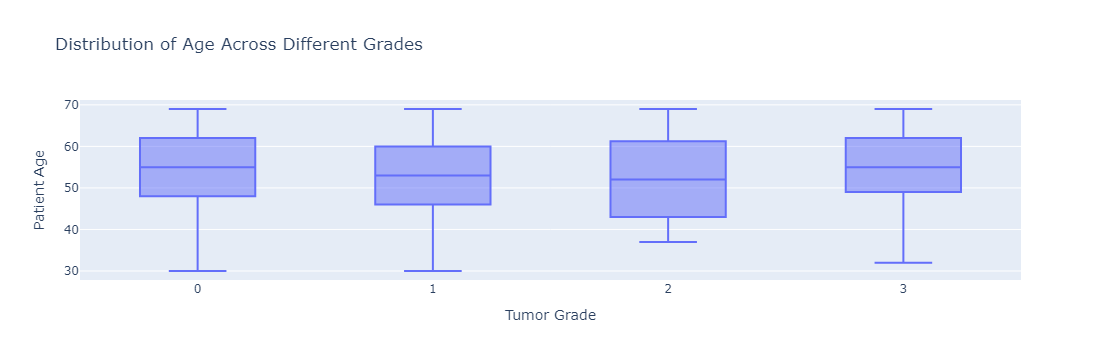

In [20]:
# Ensure the 'Age' column exists and is numerical
if 'Age' in bc_data.columns:
    fig = px.box(bc_data, x='Grade', y='Age',
                 title="Distribution of Age Across Different Grades",
                 labels={'Grade': 'Tumor Grade', 'Age': 'Patient Age'})
    fig.show()


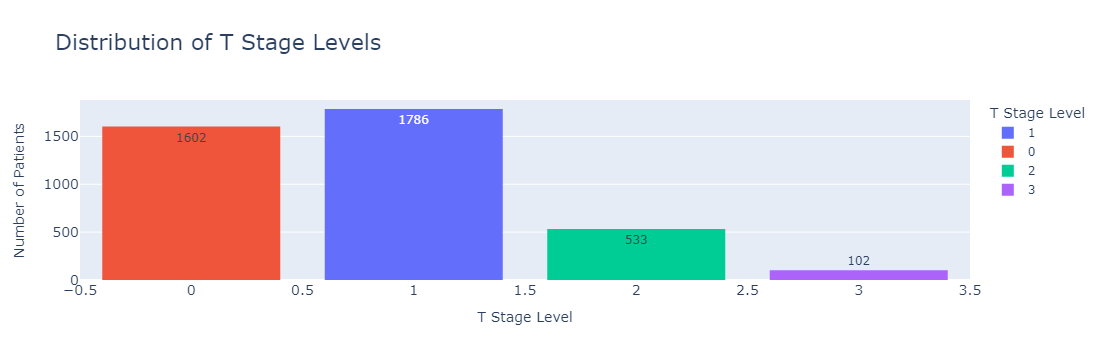

In [32]:
import plotly.express as px

# Count plot with color grouping for T Stage
fig = px.histogram(
    bc_data, 
    x='T Stage ', 
    color='T Stage ',  # Group bars by T Stage levels
    title="Distribution of T Stage Levels",
    labels={'T Stage ': 'T Stage Level', 'count': 'Number of Patients'},
    text_auto=True,  # Display counts on bars
    color_discrete_sequence=px.colors.qualitative.Plotly  # Vibrant color palette
)

# Customize layout for better readability
fig.update_layout(
    title_font=dict(size=22),
    xaxis_title='T Stage Level',
    yaxis_title='Number of Patients',
    xaxis=dict(tickfont=dict(size=14)),  # Larger axis labels
    yaxis=dict(tickfont=dict(size=14)),
    bargap=0.2,  # Space between bars
)

fig.show()


C:\Users\saras\AppData\Local\Temp\ipykernel_23368\1918376325.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



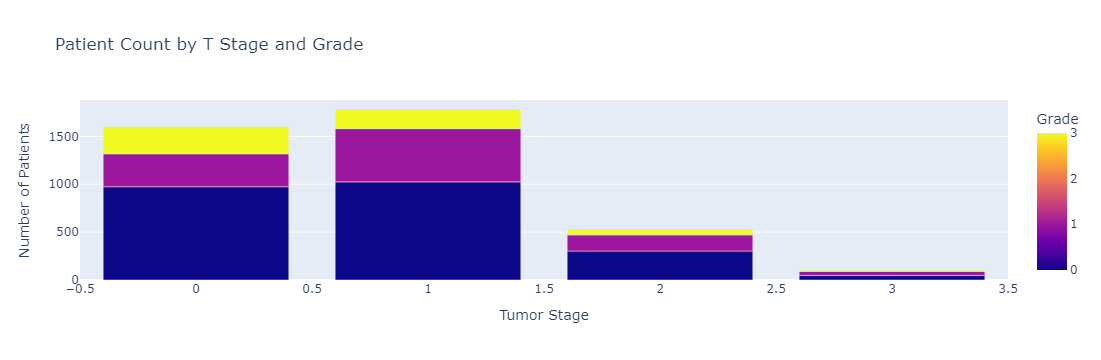

In [62]:
import plotly.express as px

# First, let's create a new DataFrame to aggregate the data
# Aggregate data by T Stage and Grade
agg_data = bc_data.groupby(['T Stage ', 'Grade'], as_index=False).agg(
    count=('Tumor Size', 'count'),
    avg_tumor_size=('Tumor Size', 'mean')
)

# Bar plot with color encoding for Grade and size based on average Tumor Size
fig = px.bar(
    agg_data,
    x='T Stage ',
    y='count',
    color='Grade',
    title="Patient Count by T Stage and Grade",
    labels={'T Stage ': 'Tumor Stage', 'count': 'Number of Patients'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.show()


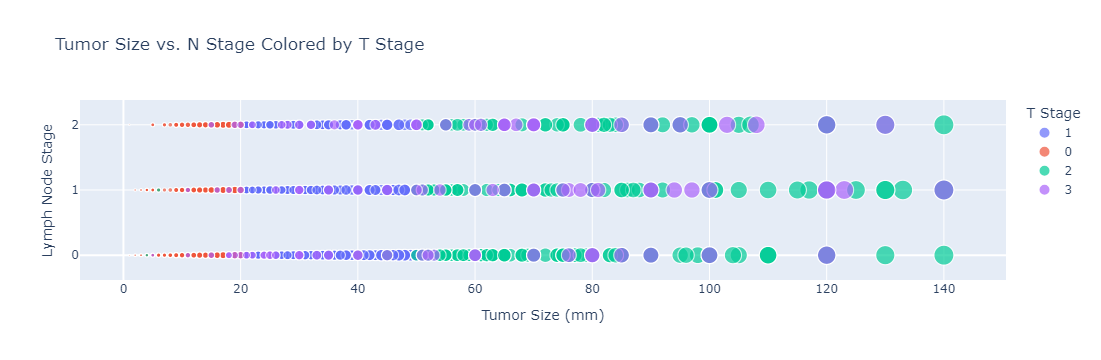

In [64]:
# Scatter plot showing Tumor Size vs. N Stage, with color by T Stage and size by Tumor Size
fig = px.scatter(
    bc_data,
    x='Tumor Size', 
    y='N Stage', 
    color='T Stage ',  # Color encoding by T Stage
    size='Tumor Size',  # Size encoding by Tumor Size
    title="Tumor Size vs. N Stage Colored by T Stage",
    labels={'Tumor Size': 'Tumor Size (mm)', 'N Stage': 'Lymph Node Stage'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.show()


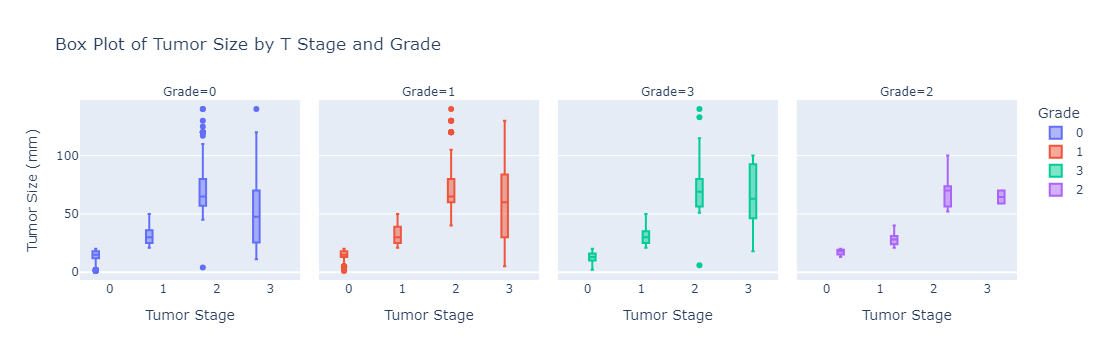

In [66]:
# Faceted box plot of Tumor Size by T Stage, separated by Grade
fig = px.box(
    bc_data,
    x='T Stage ',
    y='Tumor Size',
    color='Grade',  # Color coding by Grade
    title="Box Plot of Tumor Size by T Stage and Grade",
    labels={'T Stage ': 'Tumor Stage', 'Tumor Size': 'Tumor Size (mm)'},
    facet_col='Grade',  # Faceting by Grade
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.show()


In [70]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Introduce missingness randomly in 10% of the 'Age' column (numerical)
num_missing = int(0.1 * bc_data.shape[0])  # 10% of the rows
random_indices = np.random.choice(bc_data.index, num_missing, replace=False)
bc_data.loc[random_indices, 'Age'] = np.nan

# Introduce missingness in the 'T Stage' column (categorical)
random_indices = np.random.choice(bc_data.index, num_missing, replace=False)
bc_data.loc[random_indices, 'T Stage '] = np.nan

# Check for missing values
print("Missing values after introducing random missingness:")
print(bc_data.isnull().sum())


# Impute missing values in 'Age' with the mean
bc_data['Age'].fillna(bc_data['Age'].mean(), inplace=True)
# Impute missing values in 'T Stage' with the mode
bc_data['T Stage '].fillna(bc_data['T Stage '].mode()[0], inplace=True)


# Check for any remaining missing values
print("\nMissing values after imputation:")
print(bc_data.isnull().sum())


Missing values after introducing random missingness:
Age                                                                 402
T Stage                                                             402
N Stage                                                               0
6th Stage                                                             0
Grade                                                                 0
A Stage                                                               0
Tumor Size                                                            0
Regional Node Examined                                                0
Reginol Node Positive                                                 0
Survival Months                                                       0
Race _Other (American Indian/AK Native, Asian/Pacific Islander)       0
Race _White                                                           0
Marital Status_Married (including common law)                         0
Marital Sta

C:\Users\saras\AppData\Local\Temp\ipykernel_23368\593378297.py:21: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\saras\AppData\Local\Temp\ipykernel_23368\593378297.py:23: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

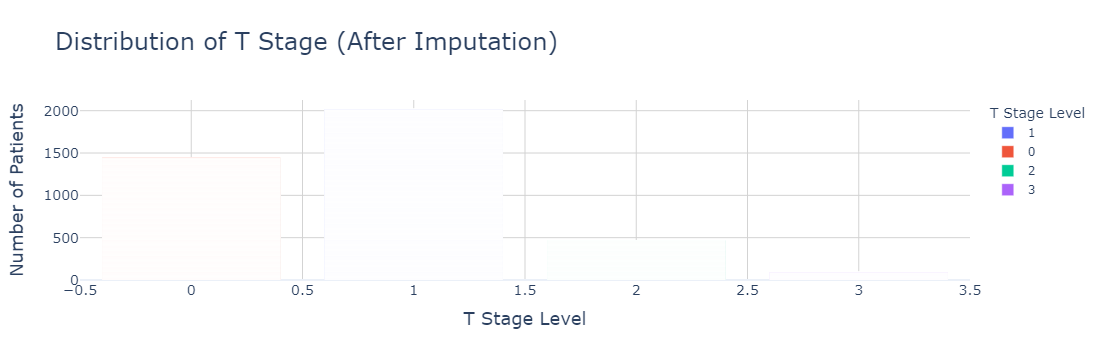

In [82]:
import plotly.express as px

# Create the bar plot for T Stage distribution after imputation
fig = px.bar(
    bc_data,
    x='T Stage ',  # Ensure the column name is correct
    title="Distribution of T Stage (After Imputation)",
    labels={'T Stage ': 'T Stage Level', 'count': 'Number of Patients'},
    color='T Stage ',  # Color bars based on T Stage
    color_discrete_sequence=px.colors.qualitative.Plotly  # Set a color sequence
)

# Update layout for better visibility
fig.update_layout(
    title_font_size=24,  # Title font size
    xaxis_title_font_size=18,  # X-axis title font size
    yaxis_title_font_size=18,  # Y-axis title font size
    xaxis_tickfont_size=14,  # X-axis tick font size
    yaxis_tickfont_size=14,  # Y-axis tick font size
    template='plotly_white',  # Use a clean template
    xaxis=dict(showgrid=True, gridcolor='LightGrey'),  # Show gridlines
    yaxis=dict(showgrid=True, gridcolor='LightGrey')   # Show gridlines
)

# Show the improved plot
fig.show()


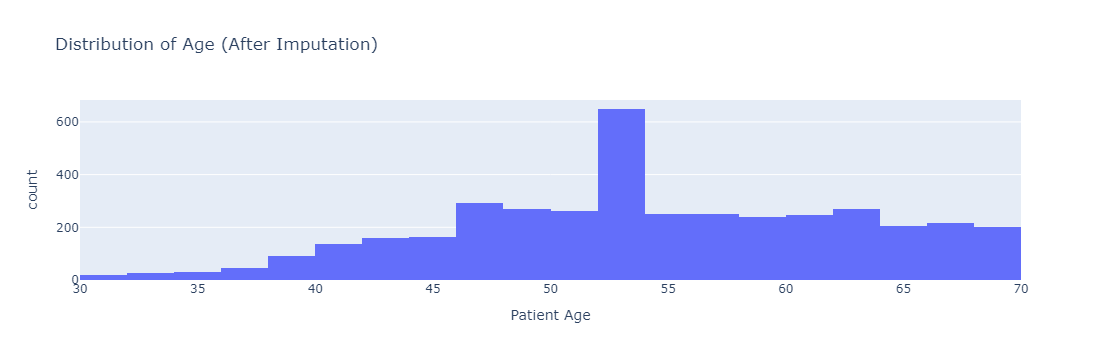

In [76]:
import plotly.express as px

# Visualize the distribution of 'Age' after imputation
fig = px.histogram(bc_data, x='Age', nbins=30, title="Distribution of Age (After Imputation)",
                   labels={'Age': 'Patient Age'})
fig.show()


In [86]:

import streamlit as st
import pandas as pd
import plotly.express as px

# Title of the app
st.title("Breast Cancer Dataset Analysis")

# Documentation
st.markdown("""
This application allows users to explore the SEER Breast Cancer dataset.
You can visualize the distribution of Tumor Stage and analyze relationships 
between different features.
""")

# Sidebar for user inputs
st.sidebar.header("User Input Features")

# Dropdown for selecting T Stage
t_stage_options = bc_data['T Stage '].unique()
selected_t_stage = st.sidebar.selectbox("Select T Stage:", options=t_stage_options)

# Dropdown for selecting N Stage
n_stage_options = bc_data['N Stage'].unique()
selected_n_stage = st.sidebar.selectbox("Select N Stage:", options=n_stage_options)

# Filter data based on selections
filtered_data = bc_data[(bc_data['T Stage '] == selected_t_stage) & (bc_data['N Stage'] == selected_n_stage)]

# Bar plot for T Stage distribution
fig_t_stage = px.bar(filtered_data, 
                      x='T Stage ', 
                      title="Distribution of T Stage for Selected N Stage",
                      labels={'T Stage ': 'T Stage Level'},
                      color='T Stage ',
                      color_discrete_sequence=px.colors.qualitative.Plotly)

st.plotly_chart(fig_t_stage)

# Scatter plot for Tumor Size vs Lymph Nodes (if applicable)
if 'Tumor Size' in bc_data.columns and 'Lymph Nodes' in bc_data.columns:
    fig_scatter = px.scatter(filtered_data, 
                              x='Tumor Size', 
                              y='Lymph Nodes',
                              color='T Stage ', 
                              title="Tumor Size vs. Lymph Nodes",
                              labels={'Tumor Size': 'Tumor Size (mm)', 'Lymph Nodes': 'Lymph Nodes Affected'})

    st.plotly_chart(fig_scatter)

# Basic statistics of filtered data
st.subheader("Basic Statistics of Filtered Data")
st.write(filtered_data.describe())


2024-10-14 21:25:13.748 
  command:

    streamlit run C:\Users\saras\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [96]:
jupyter nbconvert --to script your_notebook.ipynb




SyntaxError: invalid syntax (2725104641.py, line 1)